**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt

**Loading the data into a pandas dataframe**

In [ ]:
data = pd.read_csv("creditcard.csv")

**Reading the data**

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking at the above data description, we can see that the 'Time' feature has an extremely large standard deviation, and viewing some of the dataset above, it seems to be different for almost every data instance. Since training a machine learning model on this feature will likely lead to overfitting it, we shall drop 'Time' from our dataset.

In [ ]:
data.drop("Time", axis=1, inplace=True)

There is apparently a huge class imbalance in this dataset. We can confirm this by plotting a seaborn countplot of the different class labels.

<Axes: ylabel='count'>

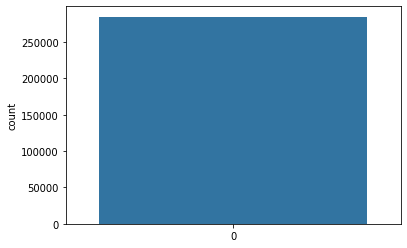

In [ ]:
sns.countplot(data["Class"])

As we can see from the above plot, fraudulent activities make up a very small fraction of this dataset. Let's further check to see if there are any null values in the data.

In [ ]:
data.isnull().any().describe()

count        30
unique        1
top       False
freq         30
dtype: object

Fortunately, the dataset is not missing any values.

**Training the Model**

Let's partition our dataset into a train, validation, and test set, where 90% of the data will be a part of the training set and 5% will be allocated for each of the validation and test set.

In [ ]:
limit = int(0.9*len(data))
train = data.loc[:limit]
val_test = data.loc[limit:]
val_test.reset_index(drop=True, inplace=True)
val_test_limit = int(0.5*len(val_test))
val = val_test.loc[:val_test_limit]
test = val_test.loc[val_test_limit:]

Let's check to see that the validation and test set include a fair amount of fraudulent activites before going any further.

In [ ]:
print("Number of fraudulent transactions in the validation set: {}"\
      .format(val["Class"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}"\
      .format(test["Class"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 11
Number of fraudulent transactions in the test set: 11


Balancing the dataset

In [ ]:
train_positive = train[train["Class"] == 1]
train_positive = pd.concat([train_positive] * int(len(train) / len(train_positive)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, train_positive.shape)
train_positive = train_positive.multiply(noise)
train_positive["Class"] = 1
train_extended = train.append(train_positive, ignore_index=True)
train_shuffled = train_extended.sample(frac=1, random_state=0).reset_index(drop=True)

<ipython-input-10-14910e705e14>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_extended = train.append(train_positive, ignore_index=True)


The ratio of positive to negative instances in our training set should now be much more balanced.

Plotting a seaborn countplot to confirm

<Axes: ylabel='count'>

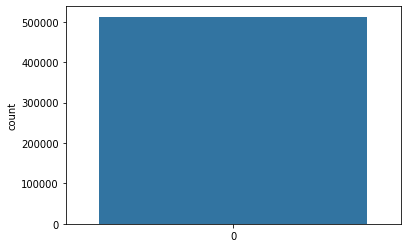

In [ ]:
sns.countplot(train_shuffled["Class"])

Let's now separate our train, validation, and test data into their predictors and labels.

In [ ]:
X_train = train_shuffled.drop(labels=["Class"], axis=1)
Y_train = train_shuffled["Class"]
X_val = val.drop(labels=["Class"], axis=1)
Y_val = val["Class"]
X_test = test.drop(labels=["Class"], axis=1)
Y_test = test["Class"]

Let's also standardize the values in our dataset so that when building a machine learning model we don't unintentionally lend more weight to some features over others. We will fit a standardizer to the training data, and transform the training, validation, and test data based on this scaler.

In [ ]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_val[X_val.columns] = scaler.transform(X_val)
X_test[X_test.columns] = scaler.transform(X_test)

Let's now build and train a feedforward neural network to detect fraudulent activity.

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train, 
                    Y_train, 
                    epochs=50, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_learning_rate=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1920      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

**Analyzing our Model**

With training ceased for our neural network, let's observe how the loss and accuracy evolved during training for both the training and validation set.

KeyError: ignored

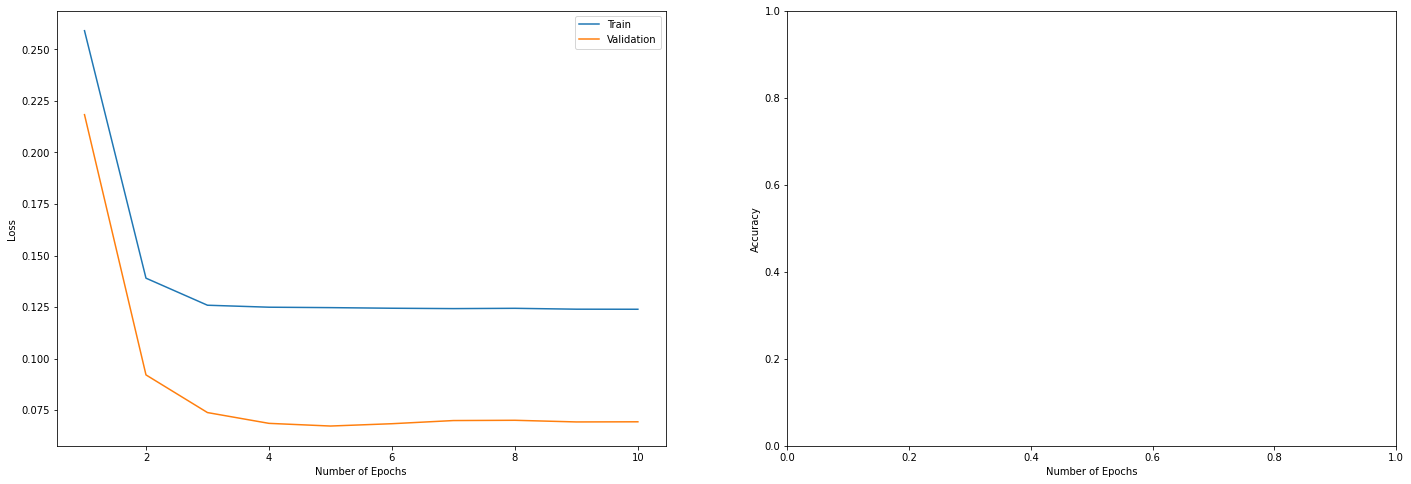

In [ ]:
num_epochs = len(history.history["loss"])
fig, axarr = plt.subplots(1, 2, figsize=(24, 8))
axarr[0].set_xlabel("Number of Epochs")
axarr[0].set_ylabel("Loss")
sns.lineplot(x=range(1, num_epochs+1), y=history.history["loss"], label="Train", ax=axarr[0])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_loss"], label="Validation", ax=axarr[0])
axarr[1].set_xlabel("Number of Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].set_ylim(0, 1)
sns.lineplot(x=range(1, num_epochs+1), y=history.history["acc"], label="Train", ax=axarr[1])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_acc"], label="Validation", ax=axarr[1])

Viewing the loss and accuracy graphs, we can see that after some initial improvements, we seemed to reach convergence after only a few epochs. Let's view the accuracy achieved by this neural network on the test set.

In [ ]:
test_results = model.evaluate(X_test, Y_test)
print("The model test accuracy is {}.".format(test_results[1]))

446/446 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9985
The model test accuracy is 0.9985253810882568.


We will use the average precision score as an evaluation metric

In [ ]:
predictions = model.predict(X_test)
ap_score = average_precision_score(Y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))

446/446 [==============================] - 1s 1ms/step
The model test average precision score is 0.2749339547338438.
